In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
os.makedirs("images", exist_ok=True)

In [10]:
df = pd.read_csv("../data/inputs/cleaned/cleaned_eda_data.csv")
df.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbrand,price_per_hp,power_to_weight
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,121.576577,0.043564
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,148.648649,0.043564
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,107.142857,0.054552
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,30,13950.0,audi,136.764706,0.043646
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,151.739130,0.040722


### Average Car Price by Brand (Matplotlib)

This bar chart shows the average price for each car brand in the dataset.
It helps us understand which brands are positioned as luxury vs affordable.

<function matplotlib.pyplot.show(close=None, block=None)>

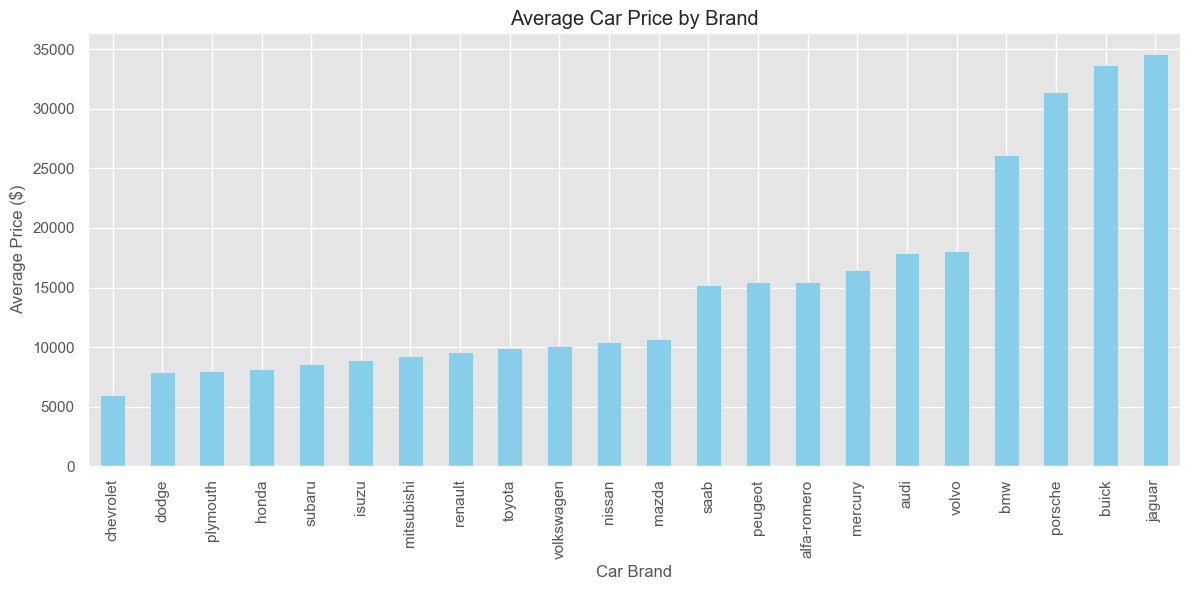

In [11]:
plt.style.use("ggplot")

avg_price_by_brand = df.groupby("carbrand")["price"].mean().sort_values()

avg_price_by_brand.plot(kind="bar", figsize=(12, 6), title="Average Car Price by Brand", color="skyblue")

plt.ylabel("Average Price ($)")
plt.xlabel("Car Brand")

plt.tight_layout()
plt.show

Save the chart as an image

In [21]:
plt.savefig("../data/inputs/images/avg_price_by_brand.png")

<Figure size 640x480 with 0 Axes>

### Price per Horsepower by Brand (Seaborn)
This barplot shows the average price per horsepower for each brand.

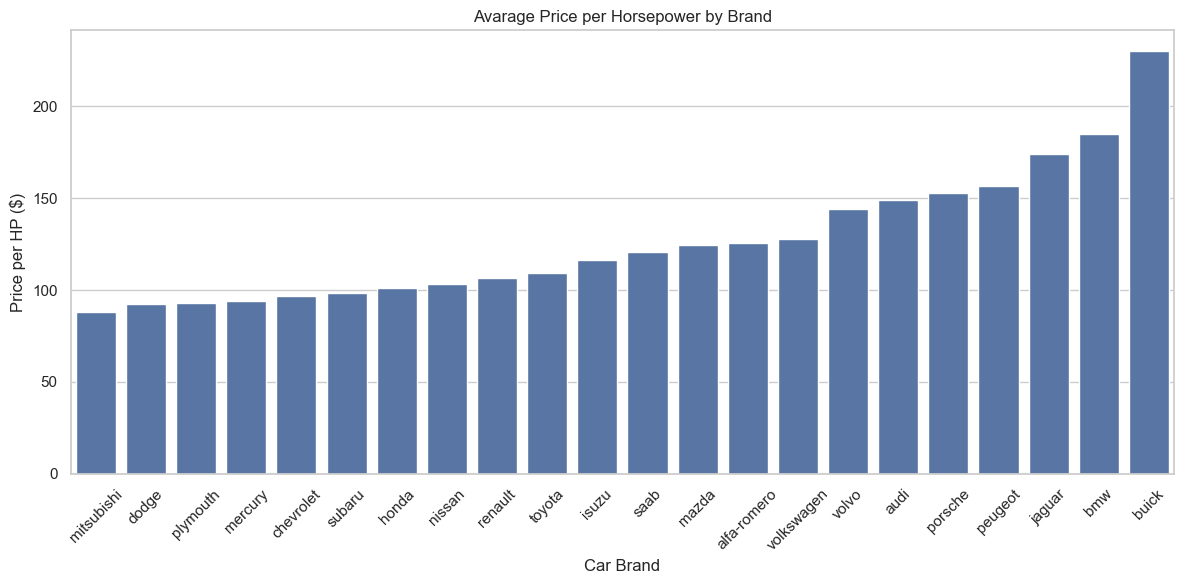

In [13]:
value_df = df.groupby("carbrand")["price_per_hp"].mean().sort_values().reset_index()

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.barplot(x="carbrand", y="price_per_hp", data=value_df)

plt.title("Avarage Price per Horsepower by Brand")
plt.ylabel("Price per HP ($)")
plt.xlabel("Car Brand")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Lower values indicate better value — more power for less money.

In [20]:
plt.savefig("../data/inputs/images/price_per_hp_by_brand.png")

<Figure size 640x480 with 0 Axes>

### Horsepower vs Price (Interactive Scatter Plot)

This chart shows the relationship between horsepower and price.
We expect that, generally, cars with more horsepower will cost more.


In [15]:
fig = px.scatter(
    df,
    x='horsepower',
    y='price',
    color='carbrand',  # Color points by brand
    hover_name='carbrand',
    title='Horsepower vs Price by Brand',
    labels={'horsepower': 'Horsepower', 'price': 'Price ($)'},
    template='plotly_white'
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(title_font_size=18)

fig.show()

Cars with more horsepower cost more.

In [19]:
fig.write_html('../data/inputs/images/hp_vs_price_plotly.html')
fig.write_image("../data/inputs/images/horsepower_vs_price.png")


 ### Are more fuel-efficient cars (higher MPG) generally cheaper?
 City MPG vs Price (Interactive Scatter Plot)
 

In [22]:
fig = px.scatter(
    df,
    x="citympg",
    y="price",
    color="carbrand",
    hover_name="carbrand",
    title="City MPG vs Car Price",
    labels={"citympg": "City MPG", "price": "Price ($)"},
    template="plotly_white"
)

fig.update_traces(marker=dict(size=10, opacity=0.7, line=dict(width=1, color="DarkSlateGrey")))
fig.update_layout(title_font_size=18)

fig.show()

This scatter plot helps answer the question: Do more fuel-efficient cars (higher MPG) tend to be cheaper? 
Each point is a car, and you can hover to see the brand.
Yes, the tend is the cheaper car are more fuel-efficient.

In [23]:
fig.write_html("../data/inputs/images/citympg_vs_price.html")
fig.write_image("../data/inputs/images/citympg_vs_price.png")


## 📊 Visualisation Summary

In this project, I created different types of visualisations to explore car prices and answer business questions. I used three libraries: **Matplotlib**, **Seaborn**, and **Plotly**.

Here is what I created:

### 📉 Matplotlib
- Bar chart of **average car price by brand**  
  ➤ Helped compare which brands are more expensive

### 🎨 Seaborn
- Bar chart of **price per horsepower by brand**  
  ➤ Helped find which brands give better value

### 🌐 Plotly
- **Interactive scatter plot**: Horsepower vs Price  
  ➤ Showed how performance affects cost
- **Interactive scatter plot**: City MPG vs Price  
  ➤ Showed how fuel efficiency affects cost

Each visual was made to support a specific business question and give clear, easy-to-read results. Plotly was especially useful for making charts interactive and easier to explore.

